# Title: Dont forget to add a title!

In [2]:
from hypnospy import Wearable
from hypnospy.data import MESAPreProcessing
from hypnospy.analysis import Viewer, NonWearingDetector, SleepWakeAnalysis
#from tf.keras.preprocessing import timeseries_dataset_from_array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


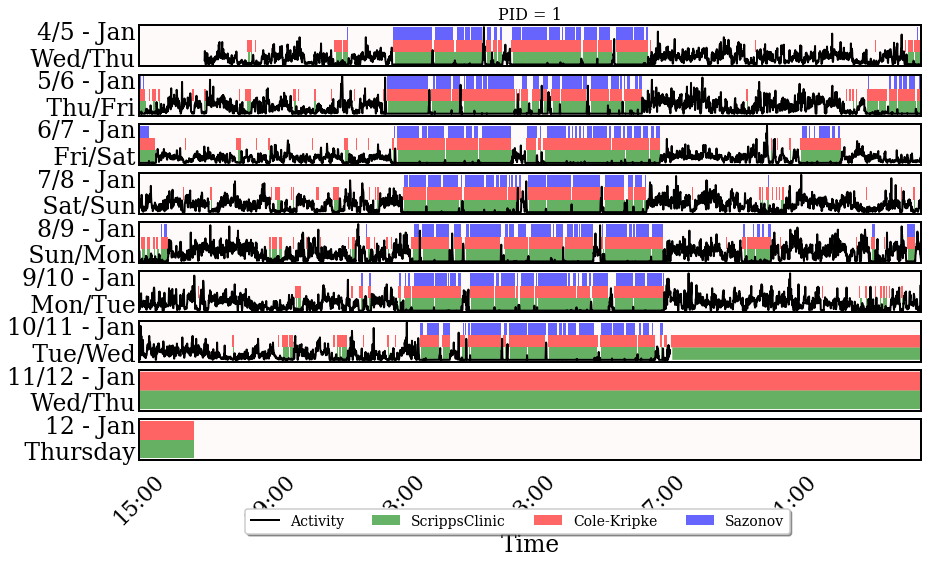

ValueError: PA Intensity levels not available for PID 1

In [4]:
# MESAPreProcessing is a specialized class to preprocess csv files from Philips Actiwatch Spectrum devices used in the MESA Sleep experiment
# MESA Sleep dataset can be found here: https://sleepdata.org/datasets/mesa/
preprocessed = MESAPreProcessing("../data/examples_mesa/mesa-sample.csv")

# Wearable is the main object in HypnosPy.
w = Wearable(preprocessed)

# In HypnosPy, we have the concept of ``experiment day'' which by default starts at midnight (00 hours).
# We can easily change it to any other time we wish. For example, lets run this script with experiment days
# that start at 3pm (15h)
w.change_start_hour_for_experiment_day(15)

                                 
# Sleep Wake Analysis module
sw = SleepWakeAnalysis(w)
sw.run_sleep_algorithm("ScrippsClinic", inplace=True) # runs alg and creates new col named 'ScrippsClinic'
sw.run_sleep_algorithm("Cole-Kripke", inplace=True)   # runs alg and creates new col named 'Cole-Kripke'
sw.run_sleep_algorithm("Sazonov", inplace=True) # runs alg and creates new col named 'Sazonov'

# View results
v = Viewer(w)
v.view_signals(signal_categories=["activity"], signal_as_area=["ScrippsClinic", "Cole-Kripke", "Sazonov"],
               colors={"area": ["green", "red", "blue"]}, alphas={"area": 0.6})
v.view_signals(signal_categories=["pa_intensity"], alphas={"area":0.6})

# Easily remove non-wearing epochs/days.
nwd = NonWearingDetector(w)
nwd.detect_non_wear(strategy="choi")
#nwd.check_valid_days(max_non_wear_minutes_per_day=180)
#nwd.drop_invalid_days()
